# Preparing data 

 Datasets

    Baby names
    Summer Olympic medals
    Automobile fuel efficiency
    Exchange rates
    GDP
    Oil prices
    Pittsburgh weather data
    Sales
    S&P 500 Index

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Reading DataFrames from multiple files

When data is spread among several files, you usually invoke pandas' read_csv() (or a similar data import function) multiple times to load the data into several DataFrames.

The data files for this example have been derived from a list of Olympic medals awarded between 1896 & 2008 compiled by the Guardian.

The column labels of each DataFrame are NOC, Country, & Total where NOC is a three-letter code for the name of the country and Total is the number of medals of that type won (bronze, silver, or gold).

In [2]:
# Import pandas
import pandas as pd

# Read 'Bronze.csv' into a DataFrame: bronze
bronze = pd.read_csv('Bronze.csv')

# Read 'Silver.csv' into a DataFrame: silver
silver = pd.read_csv('Silver.csv')

# Read 'Gold.csv' into a DataFrame: gold
gold = pd.read_csv('Gold.csv')

# Print the first five rows of gold
print(gold.head())

   NOC         Country   Total
0  USA   United States  2088.0
1  URS    Soviet Union   838.0
2  GBR  United Kingdom   498.0
3  FRA          France   378.0
4  GER         Germany   407.0


## Reading DataFrames from multiple files in a loop

As you saw in the video, loading data from multiple files into DataFrames is more efficient in a loop or a list comprehension.

Notice that this approach is not restricted to working with CSV files. That is, even if your data comes in other formats, as long as pandas has a suitable data import function, you can apply a loop or comprehension to generate a list of DataFrames imported from the source files.

Here, you'll continue working with The Guardian's Olympic medal dataset.

In [4]:
# Import pandas
import pandas as pd

# Create the list of file names: filenames
filenames = ['Gold.csv', 'Silver.csv', 'Bronze.csv']

# Create the list of three DataFrames: dataframes
dataframes = []
for filename in filenames:
    dataframes.append(pd.read_csv(filename))

# Print top 5 rows of 1st DataFrame in dataframes
print(dataframes[0].head())

   NOC         Country   Total
0  USA   United States  2088.0
1  URS    Soviet Union   838.0
2  GBR  United Kingdom   498.0
3  FRA          France   378.0
4  GER         Germany   407.0


## Combining DataFrames from multiple data files

In this exercise, you'll combine the three DataFrames from earlier exercises - gold, silver, & bronze - into a single DataFrame called medals. The approach you'll use here is clumsy. Later on in the course, you'll see various powerful methods that are frequently used in practice for concatenating or merging DataFrames.

Remember, the column labels of each DataFrame are NOC, Country, and Total, where NOC is a three-letter code for the name of the country and Total is the number of medals of that type won.

In [5]:
# Import pandas
import pandas as pd

# Make a copy of gold: medals
medals = gold.copy()

# Create list of new column labels: new_labels
new_labels = ['NOC', 'Country', 'Gold']

# Rename the columns of medals using new_labels
medals.columns = new_labels

# Add columns 'Silver' & 'Bronze' to medals
medals['Silver'] = silver['Total']
medals['Bronze'] = bronze['Total']

# Print the head of medals
print(medals.head())

   NOC         Country    Gold  Silver  Bronze
0  USA   United States  2088.0  1195.0  1052.0
1  URS    Soviet Union   838.0   627.0   584.0
2  GBR  United Kingdom   498.0   591.0   505.0
3  FRA          France   378.0   461.0   475.0
4  GER         Germany   407.0   350.0   454.0


## Sorting DataFrame with the Index & columns

It is often useful to rearrange the sequence of the rows of a DataFrame by sorting. You don't have to implement these yourself; the principal methods for doing this are .sort_index() and .sort_values().

In this exercise, you'll use these methods with a DataFrame of temperature values indexed by month names. You'll sort the rows alphabetically using the Index and numerically using a column. Notice, for this data, the original ordering is probably most useful and intuitive: the purpose here is for you to understand what the sorting methods do.

In [45]:
# Import pandas
import pandas as pd

# Read 'monthly_max_temp.csv' into a DataFrame: weather1
weather1 = pd.read_csv('sheffield_weather_station.csv', index_col='Month')

# Print the head of weather1
print(weather1.head())

# Sort the index of weather1 in alphabetical order: weather2
weather2 = weather1.sort_index()

# Print the head of weather2
print(weather2.head())

# Sort the index of weather1 in reverse alphabetical order: weather3
weather3 = weather1.sort_index(ascending=False)

# Print the head of weather3
print(weather3.head())

# Sort weather1 numerically using the values of 'Max TemperatureF': weather4
weather4 = weather1.sort_values('Max TemperatureF')

# Print the head of weather4
print(weather4.head())

ParserError: Error tokenizing data. C error: Expected 1 fields in line 4, saw 3


## Reindexing DataFrame from a list

Sorting methods are not the only way to change DataFrame Indexes. There is also the .reindex() method.

In this exercise, you'll reindex a DataFrame of quarterly-sampled mean temperature values to contain monthly samples (this is an example of upsampling or increasing the rate of samples, which you may recall from the pandas Foundations course).

The original data has the first month's abbreviation of the quarter (three-month interval) on the Index, namely Apr, Jan, Jul, and Oct. This data has been loaded into a DataFrame called weather1 and has been printed in its entirety in the IPython Shell. Notice it has only four rows (corresponding to the first month of each quarter) and that the rows are not sorted chronologically.

You'll initially use a list of all twelve month abbreviations and subsequently apply the .ffill() method to forward-fill the null entries when upsampling. This list of month abbreviations has been pre-loaded as year.

In [7]:
# Import pandas
import pandas as pd

# Reindex weather1 using the list year: weather2
weather2 = weather1.reindex(year)

# Print weather2
print(weather2)

# Reindex weather1 using the list year with forward-fill: weather3
weather3 = weather1.reindex(year).ffill()

# Print weather3
print(weather3)

NameError: name 'weather1' is not defined

## Reindexing using another DataFrame Index

Another common technique is to reindex a DataFrame using the Index of another DataFrame. The DataFrame .reindex() method can accept the Index of a DataFrame or Series as input. You can access the Index of a DataFrame with its .index attribute.

The Baby Names Dataset from data.gov summarizes counts of names (with genders) from births registered in the US since 1881. In this exercise, you will start with two baby-names DataFrames names_1981 and names_1881 loaded for you.

The DataFrames names_1981 and names_1881 both have a MultiIndex with levels name and gender giving unique labels to counts in each row. If you're interested in seeing how the MultiIndexes were set up, names_1981 and names_1881 were read in using the following commands:

    names_1981 = pd.read_csv('names1981.csv', header=None, names=['name','gender','count'], index_col=(0,1))
    names_1881 = pd.read_csv('names1881.csv', header=None, names=['name','gender','count'], index_col=(0,1))

As you can see by looking at their shapes, which have been printed in the IPython Shell, the DataFrame corresponding to 1981 births is much larger, reflecting the greater diversity of names in 1981 as compared to 1881.

Your job here is to use the DataFrame .reindex() and .dropna() methods to make a DataFrame common_names counting names from 1881 that were still popular in 1981.

In [46]:
names_1981 = pd.read_csv('names1981.csv', header=None, names=['name','gender','count'], index_col=(0,1))
names_1881 = pd.read_csv('names1881.csv', header=None, names=['name','gender','count'], index_col=(0,1))

# Import pandas
import pandas as pd

# Reindex names_1981 with index of names_1881: common_names
common_names = names_1981.reindex(names_1881.index)

# Print shape of common_names
print(common_names.shape)

# Drop rows with null counts: common_names
common_names = common_names.dropna()

# Print shape of new common_names
print(common_names.shape)

(1935, 1)
(1587, 1)


## Broadcasting in arithmetic formulas

In this exercise, you'll work with weather data pulled from wunderground.com. The DataFrame weather has been pre-loaded along with pandas as pd. It has 365 rows (observed each day of the year 2013 in Pittsburgh, PA) and 22 columns reflecting different weather measurements each day.

You'll subset a collection of columns related to temperature measurements in degrees Fahrenheit, convert them to degrees Celsius, and relabel the columns of the new DataFrame to reflect the change of units.

Remember, ordinary arithmetic operators (like +, -, *, and /) broadcast scalar values to conforming DataFrames when combining scalars & DataFrames in arithmetic expressions. Broadcasting also works with pandas Series and NumPy arrays.

In [47]:
# Extract selected columns from weather as new DataFrame: temps_f
temps_f = weather[['Min TemperatureF','Mean TemperatureF','Max TemperatureF']]

# Convert temps_f to celsius: temps_c
temps_c = (temps_f - 32) * 5/9

# Rename 'F' in column names with 'C': temps_c.columns
temps_c.columns = temps_c.columns.str.replace('F', 'C')

# Print first 5 rows of temps_c
print(temps_c.head())

NameError: name 'weather' is not defined

## Computing percentage growth of GDP

Your job in this exercise is to compute the yearly percent-change of US GDP (Gross Domestic Product) since 2008.

The data has been obtained from the Federal Reserve Bank of St. Louis and is available in the file GDP.csv, which contains quarterly data; you will resample it to annual sampling and then compute the annual growth of GDP. For a refresher on resampling, check out the relevant material from pandas Foundations.

In [49]:
import pandas as pd

# Read 'GDP.csv' into a DataFrame: gdp
gdp = pd.read_csv('gdp_usa.csv', index_col='DATE', parse_dates=True)

# Slice all the gdp data from 2008 onward: post2008
post2008 = gdp['2008':]

# Print the last 8 rows of post2008
print(post2008.tail(8))

# Resample post2008 by year, keeping last(): yearly
yearly = post2008.resample('A').last()

# Print yearly
print(yearly)

# Compute percentage growth of yearly: yearly['growth']
yearly['growth'] = yearly.pct_change() * 100

# Print yearly again
print(yearly)

              VALUE
DATE               
2014-07-01  17569.4
2014-10-01  17692.2
2015-01-01  17783.6
2015-04-01  17998.3
2015-07-01  18141.9
2015-10-01  18222.8
2016-01-01  18281.6
2016-04-01  18436.5
              VALUE
DATE               
2008-12-31  14549.9
2009-12-31  14566.5
2010-12-31  15230.2
2011-12-31  15785.3
2012-12-31  16297.3
2013-12-31  16999.9
2014-12-31  17692.2
2015-12-31  18222.8
2016-12-31  18436.5
              VALUE    growth
DATE                         
2008-12-31  14549.9       NaN
2009-12-31  14566.5  0.114090
2010-12-31  15230.2  4.556345
2011-12-31  15785.3  3.644732
2012-12-31  16297.3  3.243524
2013-12-31  16999.9  4.311144
2014-12-31  17692.2  4.072377
2015-12-31  18222.8  2.999062
2016-12-31  18436.5  1.172707


## Converting currency of stocks

In this exercise, stock prices in US Dollars for the S&P 500 in 2015 have been obtained from Yahoo Finance. The files sp500.csv for sp500 and exchange.csv for the exchange rates are both provided to you.

Using the daily exchange rate to Pounds Sterling, your task is to convert both the Open and Close column prices.

In [50]:
# Import pandas
import pandas as pd

# Read 'sp500.csv' into a DataFrame: sp500
sp500 = pd.read_csv('sp500.csv',index_col='Date', parse_dates=True)

# Read 'exchange.csv' into a DataFrame: exchange
exchange = pd.read_csv('exchange.csv',index_col='Date', parse_dates=True)

# Subset 'Open' & 'Close' columns from sp500: dollars
dollars = sp500[['Open','Close']]

# Print the head of dollars
print(dollars.head())

# Convert dollars to pounds: pounds
pounds = dollars.multiply(exchange['GBP/USD'], axis='rows')

# Print the head of pounds
print(pounds.head())

                   Open        Close
Date                                
2015-01-02  2058.899902  2058.199951
2015-01-05  2054.439941  2020.579956
2015-01-06  2022.150024  2002.609985
2015-01-07  2005.550049  2025.900024
2015-01-08  2030.609985  2062.139893
                   Open        Close
Date                                
2015-01-02  1340.364425  1339.908750
2015-01-05  1348.616555  1326.389506
2015-01-06  1332.515980  1319.639876
2015-01-07  1330.562125  1344.063112
2015-01-08  1343.268811  1364.126161


# Concatenating data

## Appending pandas Series

In this exercise, you'll load sales data from the months January, February, and March into DataFrames. Then, you'll extract Series with the 'Units' column from each and append them together with method chaining using .append().

To check that the stacking worked, you'll print slices from these Series, and finally, you'll add the result to figure out the total units sold in the first quarter.

In [51]:
# Import pandas
import pandas as pd

# Load 'sales-jan-2015.csv' into a DataFrame: jan
jan = pd.read_csv('sales-jan-2015.csv', index_col='Date', parse_dates=True)

# Load 'sales-feb-2015.csv' into a DataFrame: feb
feb = pd.read_csv('sales-feb-2015.csv', index_col='Date', parse_dates=True)

# Load 'sales-mar-2015.csv' into a DataFrame: mar
mar = pd.read_csv('sales-mar-2015.csv', index_col='Date', parse_dates=True)

# Extract the 'Units' column from jan: jan_units
jan_units = jan['Units']

# Extract the 'Units' column from feb: feb_units
feb_units = feb['Units']

# Extract the 'Units' column from mar: mar_units
mar_units = mar['Units']

# Append feb_units and then mar_units to jan_units: quarter1
quarter1 = jan_units.append(feb_units).append(mar_units)

# Print the first slice from quarter1
print(quarter1.loc['jan 27, 2015':'feb 2, 2015'])

# Print the second slice from quarter1
print(quarter1.loc['feb 26, 2015':'mar 7, 2015'])

# Compute & print total sales in quarter1
print(quarter1.sum())

Date
2015-01-27 07:11:55    18
2015-02-02 08:30:00     3
2015-02-02 21:00:00     9
Name: Units, dtype: int64
Date
2015-02-26 09:00:00     4
2015-03-06 10:11:45    17
2015-03-06 02:03:56    17
Name: Units, dtype: int64
641


## Concatenating pandas Series along row axis

Having learned how to append Series, you'll now learn how to achieve the same result by concatenating Series instead. You'll continue to work with the sales data you've seen previously. This time, the DataFrames jan, feb, and mar have been pre-loaded.

Your job is to use pd.concat() with a list of Series to achieve the same result that you would get by chaining calls to .append().

You may be wondering about the difference between pd.concat() and pandas' .append() method. One way to think of the difference is that .append() is a specific case of a concatenation, while pd.concat() gives you more flexibility, as you'll see in later exercises.

In [52]:
# Initialize empty list: units
units = []

# Build the list of Series
for month in [jan, feb, mar]:
    units.append(month['Units'])

# Concatenate the list: quarter1
quarter1 = pd.concat(units, axis='rows')

# Print slices from quarter1
print(quarter1.loc['jan 27, 2015':'feb 2, 2015'])
print(quarter1.loc['feb 26, 2015':'mar 7, 2015'])

Date
2015-01-27 07:11:55    18
2015-02-02 08:30:00     3
2015-02-02 21:00:00     9
Name: Units, dtype: int64
Date
2015-02-26 09:00:00     4
2015-03-06 10:11:45    17
2015-03-06 02:03:56    17
Name: Units, dtype: int64


## Appending DataFrames with ignore_index

In this exercise, you'll use the Baby Names Dataset (from data.gov) again. This time, both DataFrames names_1981 and names_1881 are loaded without specifying an Index column (so the default Indexes for both are RangeIndexes).

You'll use the DataFrame .append() method to make a DataFrame combined_names. To distinguish rows from the original two DataFrames, you'll add a 'year' column to each with the year (1881 or 1981 in this case). In addition, you'll specify ignore_index=True so that the index values are not used along the concatenation axis. The resulting axis will instead be labeled 0, 1, ..., n-1, which is useful if you are concatenating objects where the concatenation axis does not have meaningful indexing information.

In [66]:
names_1981 = pd.read_csv('names1981.csv', header=None, names=['name','gender','count'])
names_1881 = pd.read_csv('names1881.csv', header=None, names=['name','gender','count'])

# Add 'year' column to names_1881 & names_1981
names_1881['year'] = 1881
names_1981['year'] = 1981

# Append names_1981 after names_1881 with ignore_index=True: combined_names
combined_names = names_1881.append(names_1981, ignore_index=True)

# Print shapes of names_1981, names_1881, and combined_names
print(names_1981.shape)
print(names_1881.shape)
print(combined_names.shape)

# Print all rows that contain the name 'Morgan'
print(combined_names.loc[combined_names['name']=='Morgan'])

(19455, 4)
(1935, 4)
(21390, 4)
         name gender  count  year
1283   Morgan      M     23  1881
2096   Morgan      F   1769  1981
14390  Morgan      M    766  1981


## Concatenating pandas DataFrames along column axis

The function pd.concat() can concatenate DataFrames horizontally as well as vertically (vertical is the default). To make the DataFrames stack horizontally, you have to specify the keyword argument axis=1 or axis='columns'.

In this exercise, you'll use weather data with maximum and mean daily temperatures sampled at different rates (quarterly versus monthly). You'll concatenate the rows of both and see that, where rows are missing in the coarser DataFrame, null values are inserted in the concatenated DataFrame. This corresponds to an outer join (which you will explore in more detail in later exercises).

The files 'quarterly_max_temp.csv' and 'monthly_mean_temp.csv' have been pre-loaded into the DataFrames weather_max and weather_mean respectively, and pandas has been imported as pd.

In [67]:
# Concatenate weather_max and weather_mean horizontally: weather
weather = pd.concat([weather_max, weather_mean], axis=1)

# Print weather
print(weather)

NameError: name 'weather_max' is not defined

## Reading multiple files to build a DataFrame

It is often convenient to build a large DataFrame by parsing many files as DataFrames and concatenating them all at once. You'll do this here with three files, but, in principle, this approach can be used to combine data from dozens or hundreds of files.

Here, you'll work with DataFrames compiled from The Guardian's Olympic medal dataset.

pandas has been imported as pd and two lists have been pre-loaded: An empty list called medals, and medal_types, which contains the strings 'bronze', 'silver', and 'gold'.

In [70]:
medal_types = ['bronze', 'silver', 'gold']

medals = []

for medal in medal_types:

    # Create the file name: file_name
    file_name = "%s_top5.csv" % medal
    
    # Create list of column names: columns
    columns = ['Country', medal]
    
    # Read file_name into a DataFrame: df
    medal_df = pd.read_csv(file_name, header=0, index_col='Country', names=columns)

    # Append medal_df to medals
    medals.append(medal_df)

# Concatenate medals horizontally: medals
medals = pd.concat(medals, axis='columns')

# Print medals
print(medals)

                bronze  silver    gold
France           475.0   461.0     NaN
Germany          454.0     NaN   407.0
Italy              NaN   394.0   460.0
Soviet Union     584.0   627.0   838.0
United Kingdom   505.0   591.0   498.0
United States   1052.0  1195.0  2088.0


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



## Concatenating vertically to get MultiIndexed rows

When stacking a sequence of DataFrames vertically, it is sometimes desirable to construct a MultiIndex to indicate the DataFrame from which each row originated. This can be done by specifying the keys parameter in the call to pd.concat(), which generates a hierarchical index with the labels from keys as the outermost index label. So you don't have to rename the columns of each DataFrame as you load it. Instead, only the Index column needs to be specified.

Here, you'll continue working with DataFrames compiled from The Guardian's Olympic medal dataset. Once again, pandas has been imported as pd and two lists have been pre-loaded: An empty list called medals, and medal_types, which contains the strings 'bronze', 'silver', and 'gold'.

In [72]:
medals = []

for medal in medal_types:

    file_name = "%s_top5.csv" % medal

    # Read file_name into a DataFrame: medal_df
    medal_df = pd.read_csv(file_name, index_col='Country')
    
    # Append medal_df to medals
    medals.append(medal_df)

# Concatenate medals: medals
medals = pd.concat(medals, keys=['bronze', 'silver', 'gold'])

# Print medals
print(medals)

                        Total
       Country               
bronze United States   1052.0
       Soviet Union     584.0
       United Kingdom   505.0
       France           475.0
       Germany          454.0
silver United States   1195.0
       Soviet Union     627.0
       United Kingdom   591.0
       France           461.0
       Italy            394.0
gold   United States   2088.0
       Soviet Union     838.0
       United Kingdom   498.0
       Italy            460.0
       Germany          407.0


## Slicing MultiIndexed DataFrames

This exercise picks up where the last ended (again using The Guardian's Olympic medal dataset).

You are provided with the MultiIndexed DataFrame as produced at the end of the preceding exercise. Your task is to sort the DataFrame and to use the pd.IndexSlice to extract specific slices. Check out this exercise from Manipulating DataFrames with pandas to refresh your memory on how to deal with MultiIndexed DataFrames.

pandas has been imported for you as pd and the DataFrame medals is already in your namespace.

In [73]:
# Sort the entries of medals
medals_sorted = medals.sort_index(level=0)

# Print the number of Bronze medals won by Germany
print(medals_sorted.loc[('bronze','Germany')])

# Print data about silver medals
print(medals_sorted.loc['silver'])

# Create alias for pd.IndexSlice: idx
idx = pd.IndexSlice

# Print all the data on medals won by the United Kingdom
print(medals_sorted.loc[idx[:,'United Kingdom'], :])

Total    454.0
Name: (bronze, Germany), dtype: float64
                 Total
Country               
France           461.0
Italy            394.0
Soviet Union     627.0
United Kingdom   591.0
United States   1195.0
                       Total
       Country              
bronze United Kingdom  505.0
gold   United Kingdom  498.0
silver United Kingdom  591.0


## Concatenating horizontally to get MultiIndexed columns

It is also possible to construct a DataFrame with hierarchically indexed columns. For this exercise, you'll start with pandas imported and a list of three DataFrames called dataframes. All three DataFrames contain 'Company', 'Product', and 'Units' columns with a 'Date' column as the index pertaining to sales transactions during the month of February, 2015. The first DataFrame describes Hardware transactions, the second describes Software transactions, and the third, Service transactions.

Your task is to concatenate the DataFrames horizontally and to create a MultiIndex on the columns. From there, you can summarize the resulting DataFrame and slice some information from it.

In [74]:
# Concatenate dataframes: february
february = pd.concat(dataframes, keys=['Hardware','Software','Service'], axis=1)

# Print february.info()
print(february.info())

# Assign pd.IndexSlice: idx
idx = pd.IndexSlice

# Create the slice: slice_2_8
slice_2_8 = february.loc['2015-2-2':'2015-2-8', idx[:,'Company']]

# Print slice_2_8
print(slice_2_8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 9 columns):
(Hardware, NOC)        138 non-null object
(Hardware, Country)    138 non-null object
(Hardware, Total)      96 non-null float64
(Software, NOC)        138 non-null object
(Software, Country)    138 non-null object
(Software, Total)      119 non-null float64
(Service, NOC)         138 non-null object
(Service, Country)     138 non-null object
(Service, Total)       119 non-null float64
dtypes: float64(3), object(6)
memory usage: 9.8+ KB
None


KeyError: 'Company'

## Concatenating DataFrames from a dict

You're now going to revisit the sales data you worked with earlier in the chapter. Three DataFrames jan, feb, and mar have been pre-loaded for you. Your task is to aggregate the sum of all sales over the 'Company' column into a single DataFrame. You'll do this by constructing a dictionary of these DataFrames and then concatenating them.

In [75]:
# Make the list of tuples: month_list
month_list = [('january', jan), ('february', feb), ('march', mar)]

# Create an empty dictionary: month_dict
month_dict = {}

for month_name, month_data in month_list:

    # Group month_data: month_dict[month_name]
    month_dict[month_name] = month_data.groupby('Company').sum()

# Concatenate data in month_dict: sales
sales = pd.concat(month_dict)

# Print sales
print(sales)

# Print all sales by Mediacore
idx = pd.IndexSlice
print(sales.loc[idx[:, 'Mediacore'], :])

                          Units
         Company               
february Acme Coporation     34
         Hooli               30
         Initech             30
         Mediacore           45
         Streeplex           36
january  Acme Coporation     76
         Hooli               70
         Initech             37
         Mediacore           15
         Streeplex           50
march    Acme Coporation      5
         Hooli               37
         Initech             68
         Mediacore           68
         Streeplex           40
                    Units
         Company         
february Mediacore     45
january  Mediacore     15
march    Mediacore     68


## Concatenating DataFrames with inner join

Here, you'll continue working with DataFrames compiled from The Guardian's Olympic medal dataset.

The DataFrames bronze, silver, and gold have been pre-loaded for you.

Your task is to compute an inner join.

In [22]:
# Create the list of DataFrames: medal_list
medal_list = [bronze, silver, gold]

# Concatenate medal_list horizontally using an inner join: medals
medals = pd.concat(medal_list, keys=['bronze', 'silver', 'gold'], axis=1, join='inner')

# Print medals
print(medals)

    bronze                                silver                         \
       NOC                Country   Total    NOC                Country   
0      USA          United States  1052.0    USA          United States   
1      URS           Soviet Union   584.0    URS           Soviet Union   
2      GBR         United Kingdom   505.0    GBR         United Kingdom   
3      FRA                 France   475.0    FRA                 France   
4      GER                Germany   454.0    GER                Germany   
5      AUS              Australia   413.0    AUS              Australia   
6      ITA                  Italy   374.0    ITA                  Italy   
7      HUN                Hungary   345.0    HUN                Hungary   
8      SWE                 Sweden   325.0    SWE                 Sweden   
9      NED            Netherlands   320.0    NED            Netherlands   
10     ROU                Romania   282.0    ROU                Romania   
11     JPN               

## Resampling & concatenating DataFrames with inner join

In this exercise, you'll compare the historical 10-year GDP (Gross Domestic Product) growth in the US and in China. The data for the US starts in 1947 and is recorded quarterly; by contrast, the data for China starts in 1961 and is recorded annually.

You'll need to use a combination of resampling and an inner join to align the index labels. You'll need an appropriate offset alias for resampling, and the method .resample() must be chained with some kind of aggregation method (.pct_change() and .last() in this case).

pandas has been imported as pd, and the DataFrames china and us have been pre-loaded, with the output of china.head() and us.head() printed in the IPython Shell.

In [138]:
china = pd.read_csv('gdp_china.csv', names=['Year', 'China'], skiprows=2, index_col=0, parse_dates=True)
us = pd.read_csv('gdp_usa.csv', names=['Year', 'US'], skiprows=1, index_col=0, parse_dates=True)

# Resample and tidy china: china_annual
china_annual = china.resample('A').mean().pct_change(10).dropna()

# Resample and tidy us: us_annual
us_annual = us.resample('A').mean().pct_change(10).dropna()

# Concatenate china_annual and us_annual: gdp
gdp = pd.concat([china_annual, us_annual], axis=1, join='inner')

# Resample gdp and print
print(gdp.resample('10A').last())

               China        US
Year                          
1971-12-31  0.988860  1.073188
1981-12-31  0.972048  1.749631
1991-12-31  0.962528  0.922811
2001-12-31  2.492511  0.720398
2011-12-31  4.623958  0.460947
2021-12-31  3.789936  0.377506


# Merging data

## Merging on a specific column

This exercise follows on the last one with the DataFrames revenue and managers for your company. You expect your company to grow and, eventually, to operate in cities with the same name on different states. As such, you decide that every branch should have a numerical branch identifier. Thus, you add a branch_id column to both DataFrames. Moreover, new cities have been added to both the revenue and managers DataFrames as well. pandas has been imported as pd and both DataFrames are available in your namespace.

    managers = 
       branch_id         city  manager
    0         10       Austin  Charles
    1         20       Denver     Joel
    2         47    Mendocino    Brett
    3         31  Springfield    Sally
    
    revenue =
       branch_id         city  revenue
    0         10       Austin      100
    1         20       Denver       83
    2         30  Springfield        4
    3         47    Mendocino      200

At present, there should be a 1-to-1 relationship between the city and branch_id fields. In that case, the result of a merge on the city columns ought to give you the same output as a merge on the branch_id columns. Do they? Can you spot an ambiguity in one of the DataFrames?

In [139]:
managers = pd.DataFrame()
# Merge revenue with managers on 'city': merge_by_city
merge_by_city = pd.merge(revenue, managers, on='city')

# Print merge_by_city
print(merge_by_city)

# Merge revenue with managers on 'branch_id': merge_by_id
merge_by_id = pd.merge(revenue, managers, on='branch_id')

# Print merge_by_id
print(merge_by_id)

NameError: name 'revenue' is not defined

## Merging on columns with non-matching labels

You continue working with the revenue & managers DataFrames from before. This time, someone has changed the field name 'city' to 'branch' in the managers table. Now, when you attempt to merge DataFrames, an exception is thrown:

    >>> pd.merge(revenue, managers, on='city')
    Traceback (most recent call last):
        ... <text deleted> ...
        pd.merge(revenue, managers, on='city')
        ... <text deleted> ...
    KeyError: 'city'

Given this, it will take a bit more work for you to join or merge on the city/branch name. You have to specify the left_on and right_on parameters in the call to pd.merge().

As before, pandas has been pre-imported as pd and the revenue and managers DataFrames are in your namespace. They have been printed in the IPython Shell so you can examine the columns prior to merging.

Are you able to merge better than in the last exercise? How should the rows with Springfield be handled?

In [25]:
# Merge revenue & managers on 'city' & 'branch': combined
combined = pd.merge(revenue, managers, left_on='city', right_on='branch')

# Print combined
print(combined)

NameError: name 'revenue' is not defined

## Merging on multiple columns

Another strategy to disambiguate cities with identical names is to add information on the states in which the cities are located. To this end, you add a column called state to both DataFrames from the preceding exercises. Again, pandas has been pre-imported as pd and the revenue and managers DataFrames are in your namespace.

Your goal in this exercise is to use pd.merge() to merge DataFrames using multiple columns (using 'branch_id', 'city', and 'state' in this case).

Are you able to match all your company's branches correctly?

In [26]:
# Add 'state' column to revenue: revenue['state']
revenue['state'] = ['TX','CO','IL','CA']

# Add 'state' column to managers: managers['state']
managers['state'] = ['TX','CO','CA','MO']

# Merge revenue & managers on 'branch_id', 'city', & 'state': combined
combined = pd.merge(revenue, managers, on=['branch_id', 'city', 'state'])

# Print combined
print(combined)

NameError: name 'revenue' is not defined

## Left & right merging on multiple columns

You now have, in addition to the revenue and managers DataFrames from prior exercises, a DataFrame sales that summarizes units sold from specific branches (identified by city and state but not branch_id).

Once again, the managers DataFrame uses the label branch in place of city as in the other two DataFrames. Your task here is to employ left and right merges to preserve data and identify where data is missing.

By merging revenue and sales with a right merge, you can identify the missing revenue values. Here, you don't need to specify left_on or right_on because the columns to merge on have matching labels.

By merging sales and managers with a left merge, you can identify the missing manager. Here, the columns to merge on have conflicting labels, so you must specify left_on and right_on. In both cases, you're looking to figure out how to connect the fields in rows containing Springfield.

pandas has been imported as pd and the three DataFrames revenue, managers, and sales have been pre-loaded. They have been printed for you to explore in the IPython Shell.

In [27]:
# Merge revenue and sales: revenue_and_sales
revenue_and_sales = pd.merge(revenue, sales, on=['city','state'], how='right')

# Print revenue_and_sales
print(revenue_and_sales)

# Merge sales and managers: sales_and_managers
sales_and_managers = pd.merge(sales, managers, left_on=['city','state'], right_on=['branch','state'], how='left')

# Print sales_and_managers
print(sales_and_managers)

NameError: name 'revenue' is not defined

## Merging DataFrames with outer join

This exercise picks up where the previous one left off. The DataFrames revenue, managers, and sales are pre-loaded into your namespace (and, of course, pandas is imported as pd). Moreover, the merged DataFrames revenue_and_sales and sales_and_managers have been pre-computed exactly as you did in the previous exercise.

The merged DataFrames contain enough information to construct a DataFrame with 5 rows with all known information correctly aligned and each branch listed only once. You will try to merge the merged DataFrames on all matching keys (which computes an inner join by default). You can compare the result to an outer join and also to an outer join with restricted subset of columns as keys.

In [29]:
# Perform the first merge: merge_default
merge_default = pd.merge(sales_and_managers, revenue_and_sales)

# Print merge_default
print(merge_default)

# Perform the second merge: merge_outer
merge_outer = pd.merge(sales_and_managers, revenue_and_sales, how='outer')

# Print merge_outer
print(merge_outer)

# Perform the third merge: merge_outer_on
merge_outer_on = pd.merge(sales_and_managers, revenue_and_sales, on=['city','state'], how='outer')

# Print merge_outer_on
print(merge_outer_on)

NameError: name 'sales_and_managers' is not defined

## Using merge_ordered()

This exercise uses pre-loaded DataFrames austin and houston that contain weather data from the cities Austin and Houston respectively. They have been printed in the IPython Shell for you to examine.

Weather conditions were recorded on separate days and you need to merge these two DataFrames together such that the dates are ordered. To do this, you'll use pd.merge_ordered(). After you're done, note the order of the rows before and after merging.

In [30]:
# Perform the first ordered merge: tx_weather
tx_weather = pd.merge_ordered(austin, houston)

# Print tx_weather
print(tx_weather)

# Perform the second ordered merge: tx_weather_suff
tx_weather_suff = pd.merge_ordered(austin, houston, on='date', suffixes=['_aus', '_hus'])

# Print tx_weather_suff
print(tx_weather_suff)

# Perform the third ordered merge: tx_weather_ffill
tx_weather_ffill = pd.merge_ordered(austin, houston, on='date', fill_method='ffill', suffixes=['_aus', '_hus'])

# Print tx_weather_ffill
print(tx_weather_ffill)

NameError: name 'austin' is not defined

## Using merge_asof()

Similar to pd.merge_ordered(), the pd.merge_asof() function will also merge values in order using the on column, but for each row in the left DataFrame, only rows from the right DataFrame whose 'on' column values are less than the left value will be kept.

This function can be used to align disparate datetime frequencies without having to first resample.

Here, you'll merge monthly oil prices (US dollars) into a full automobile fuel efficiency dataset. The oil and automobile DataFrames have been pre-loaded as oil and auto. The first 5 rows of each have been printed in the IPython Shell for you to explore.

These datasets will align such that the first price of the year will be broadcast into the rows of the automobiles DataFrame. This is considered correct since by the start of any given year, most automobiles for that year will have already been manufactured.

You'll then inspect the merged DataFrame, resample by year and compute the mean 'Price' and 'mpg'. You should be able to see a trend in these two columns, that you can confirm by computing the Pearson correlation between resampled 'Price' and 'mpg'.

In [31]:
# Merge auto and oil: merged
merged = pd.merge_asof(auto, oil, left_on='yr', right_on='Date')

# Print the tail of merged
print(merged.tail())

# Resample merged: yearly
yearly = merged.resample('A',on='Date')[['mpg','Price']].mean()

# Print yearly
print(yearly)

# Print yearly.corr()
print(yearly.corr())

NameError: name 'auto' is not defined

# Case Study - Summer Olympics

## Loading Olympic edition DataFrame

In this chapter, you'll be using The Guardian's Olympic medal dataset.

Your first task here is to prepare a DataFrame editions from a tab-separated values (TSV) file.

Initially, editions has 26 rows (one for each Olympic edition, i.e., a year in which the Olympics was held) and 7 columns: 'Edition', 'Bronze', 'Gold', 'Silver', 'Grand Total', 'City', and 'Country'.

For the analysis that follows, you won't need the overall medal counts, so you want to keep only the useful columns from editions: 'Edition', 'Grand Total', City, and Country.

In [140]:
# Import pandas
import pandas as pd

# Create file path: file_path
file_path = 'Summer Olympic medalists 1896 to 2008 - EDITIONS.tsv'

# Load DataFrame from file_path: editions
editions = pd.read_csv(file_path, sep='\t')

# Extract the relevant columns: editions
editions = editions[['Edition', 'Grand Total', 'City', 'Country']]

# Print editions DataFrame
print(editions)

    Edition  Grand Total         City                     Country
0      1896          151       Athens                      Greece
1      1900          512        Paris                      France
2      1904          470    St. Louis               United States
3      1908          804       London              United Kingdom
4      1912          885    Stockholm                      Sweden
5      1920         1298      Antwerp                     Belgium
6      1924          884        Paris                      France
7      1928          710    Amsterdam                 Netherlands
8      1932          615  Los Angeles               United States
9      1936          875       Berlin                     Germany
10     1948          814       London              United Kingdom
11     1952          889     Helsinki                     Finland
12     1956          885    Melbourne                   Australia
13     1960          882         Rome                       Italy
14     196

## Loading IOC codes DataFrame

Your task here is to prepare a DataFrame ioc_codes from a comma-separated values (CSV) file.

Initially, ioc_codes has 200 rows (one for each country) and 3 columns: 'Country', 'NOC', & 'ISO code'.

For the analysis that follows, you want to keep only the useful columns from ioc_codes: 'Country' and 'NOC' (the column 'NOC' contains three-letter codes representing each country).

In [141]:
# Import pandas
import pandas as pd

# Create the file path: file_path
file_path = 'Summer Olympic medalists 1896 to 2008 - IOC COUNTRY CODES.csv'

# Load DataFrame from file_path: ioc_codes
ioc_codes = pd.read_csv(file_path)

# Extract the relevant columns: ioc_codes
ioc_codes = ioc_codes[['Country', 'NOC']]

# Print first and last 5 rows of ioc_codes
print(ioc_codes.head())
print(ioc_codes.tail())

           Country  NOC
0      Afghanistan  AFG
1          Albania  ALB
2          Algeria  ALG
3  American Samoa*  ASA
4          Andorra  AND
             Country  NOC
196          Vietnam  VIE
197  Virgin Islands*  ISV
198            Yemen  YEM
199           Zambia  ZAM
200         Zimbabwe  ZIM


## Building medals DataFrame

Here, you'll start with the DataFrame editions from the previous exercise.

You have a sequence of files summer_1896.csv, summer_1900.csv, ..., summer_2008.csv, one for each Olympic edition (year).

You will build up a dictionary medals_dict with the Olympic editions (years) as keys and DataFrames as values.

The dictionary is built up inside a loop over the year of each Olympic edition (from the Index of editions).

Once the dictionary of DataFrames is built up, you will combine the DataFrames using pd.concat().

In [154]:
# Import pandas
import pandas as pd

medals_raw = pd.read_csv('Summer Olympic medalists 1896 to 2008 - ALL MEDALISTS.tsv', sep='\t', skiprows=4)
medals = medals_raw[['Athlete', 'NOC', 'Medal', 'Edition']]

# Print first and last 5 rows of medals
print(medals.head())
print(medals.tail())


# Create empty dictionary: medals_dict
medals_dict = {}

for year in editions['Edition']:

    # Create the file path: file_path
    file_path = 'summer_{:d}.csv'.format(year)
    
    # Load file_path into a DataFrame: medals_dict[year]
    medals_dict[year] = pd.read_csv(file_path)
    
    # Extract relevant columns: medals_dict[year]
    medals_dict[year] = medals_dict[year][['Athlete', 'NOC', 'Medal']]
    
    # Assign year to column 'Edition' of medals_dict
    medals_dict[year]['Edition'] = year
    
# Concatenate medals_dict: medals
medals = pd.concat(medals_dict, ignore_index=True)

# Print first and last 5 rows of medals
print(medals.head())
print(medals.tail())

              Athlete  NOC   Medal  Edition
0       HAJOS, Alfred  HUN    Gold     1896
1    HERSCHMANN, Otto  AUT  Silver     1896
2   DRIVAS, Dimitrios  GRE  Bronze     1896
3  MALOKINIS, Ioannis  GRE    Gold     1896
4  CHASAPIS, Spiridon  GRE  Silver     1896
                    Athlete  NOC   Medal  Edition
29211        ENGLICH, Mirko  GER  Silver     2008
29212  MIZGAITIS, Mindaugas  LTU  Bronze     2008
29213       PATRIKEEV, Yuri  ARM  Bronze     2008
29214         LOPEZ, Mijain  CUB    Gold     2008
29215        BAROEV, Khasan  RUS  Silver     2008


FileNotFoundError: File b'summer_1896.csv' does not exist

## Counting medals by country/edition in a pivot table

Here, you'll start with the concatenated DataFrame medals from the previous exercise.

You can construct a pivot table to see the number of medals each country won in each year. The result is a new DataFrame with the Olympic edition on the Index and with 138 country NOC codes as columns. If you want a refresher on pivot tables, it may be useful to refer back to the relevant exercises in Manipulating DataFrames with pandas.

In [151]:
# Construct the pivot_table: medal_counts
medal_counts = medals.pivot_table(index='Edition', values='Athlete', columns='NOC', aggfunc='count')

# Print the first & last 5 rows of medal_counts
print(medal_counts.head())
print(medal_counts.tail())

NOC      AFG  AHO  ALG   ANZ  ARG  ARM  AUS   AUT  AZE  BAH  ...   URS  URU  \
Edition                                                      ...              
1896     NaN  NaN  NaN   NaN  NaN  NaN  2.0   5.0  NaN  NaN  ...   NaN  NaN   
1900     NaN  NaN  NaN   NaN  NaN  NaN  5.0   6.0  NaN  NaN  ...   NaN  NaN   
1904     NaN  NaN  NaN   NaN  NaN  NaN  NaN   1.0  NaN  NaN  ...   NaN  NaN   
1908     NaN  NaN  NaN  19.0  NaN  NaN  NaN   1.0  NaN  NaN  ...   NaN  NaN   
1912     NaN  NaN  NaN  10.0  NaN  NaN  NaN  14.0  NaN  NaN  ...   NaN  NaN   

NOC        USA  UZB  VEN  VIE  YUG  ZAM  ZIM   ZZX  
Edition                                             
1896      20.0  NaN  NaN  NaN  NaN  NaN  NaN   6.0  
1900      55.0  NaN  NaN  NaN  NaN  NaN  NaN  34.0  
1904     394.0  NaN  NaN  NaN  NaN  NaN  NaN   8.0  
1908      63.0  NaN  NaN  NaN  NaN  NaN  NaN   NaN  
1912     101.0  NaN  NaN  NaN  NaN  NaN  NaN   NaN  

[5 rows x 138 columns]
NOC      AFG  AHO  ALG  ANZ   ARG  ARM    AUS  AUT 

## Computing fraction of medals per Olympic edition

In this exercise, you'll start with the DataFrames editions, medals, & medal_counts from prior exercises.

You can extract a Series with the total number of medals awarded in each Olympic edition.

The DataFrame medal_counts can be divided row-wise by the total number of medals awarded each edition; the method .divide() performs the broadcast as you require.

This gives you a normalized indication of each country's performance in each edition.

In [152]:
# Set Index of editions: totals
totals = editions.set_index('Edition')

# Reassign totals['Grand Total']: totals
totals = totals['Grand Total']

# Divide medal_counts by totals: fractions
fractions = medal_counts.divide(totals, axis='rows')

# Print first & last 5 rows of fractions
print(fractions.head())
print(fractions.tail())

NOC      AFG  AHO  ALG       ANZ  ARG  ARM       AUS       AUT  AZE  BAH  \
Edition                                                                    
1896     NaN  NaN  NaN       NaN  NaN  NaN  0.013245  0.033113  NaN  NaN   
1900     NaN  NaN  NaN       NaN  NaN  NaN  0.009766  0.011719  NaN  NaN   
1904     NaN  NaN  NaN       NaN  NaN  NaN       NaN  0.002128  NaN  NaN   
1908     NaN  NaN  NaN  0.023632  NaN  NaN       NaN  0.001244  NaN  NaN   
1912     NaN  NaN  NaN  0.011299  NaN  NaN       NaN  0.015819  NaN  NaN   

NOC        ...     URS  URU       USA  UZB  VEN  VIE  YUG  ZAM  ZIM       ZZX  
Edition    ...                                                                 
1896       ...     NaN  NaN  0.132450  NaN  NaN  NaN  NaN  NaN  NaN  0.039735  
1900       ...     NaN  NaN  0.107422  NaN  NaN  NaN  NaN  NaN  NaN  0.066406  
1904       ...     NaN  NaN  0.838298  NaN  NaN  NaN  NaN  NaN  NaN  0.017021  
1908       ...     NaN  NaN  0.078358  NaN  NaN  NaN  NaN  NaN  NaN

## Computing percentage change in fraction of medals won

Here, you'll start with the DataFrames editions, medals, medal_counts, & fractions from prior exercises.

To see if there is a host country advantage, you first want to see how the fraction of medals won changes from edition to edition.

The expanding mean provides a way to see this down each column. It is the value of the mean with all the data available up to that point in time. If you are interested in learning more about pandas' expanding transformations, this section of the pandas documentation has additional information.

In [155]:
# Apply the expanding mean: mean_fractions
mean_fractions = fractions.expanding().mean()

# Compute the percentage change: fractions_change
fractions_change = mean_fractions.pct_change()*100

# Reset the index of fractions_change: fractions_change
fractions_change = fractions_change.reset_index()

# Print first & last 5 rows of fractions_change
print(fractions_change.head())
print(fractions_change.tail())

NOC  Edition  AFG  AHO  ALG        ANZ  ARG  ARM        AUS        AUT  AZE  \
0       1896  NaN  NaN  NaN        NaN  NaN  NaN        NaN        NaN  NaN   
1       1900  NaN  NaN  NaN        NaN  NaN  NaN -13.134766 -32.304688  NaN   
2       1904  NaN  NaN  NaN        NaN  NaN  NaN   0.000000 -30.169386  NaN   
3       1908  NaN  NaN  NaN        NaN  NaN  NaN   0.000000 -23.013510  NaN   
4       1912  NaN  NaN  NaN -26.092774  NaN  NaN   0.000000   6.254438  NaN   

NOC    ...      URS  URU         USA  UZB  VEN  VIE  YUG  ZAM  ZIM        ZZX  
0      ...      NaN  NaN         NaN  NaN  NaN  NaN  NaN  NaN  NaN        NaN  
1      ...      NaN  NaN   -9.448242  NaN  NaN  NaN  NaN  NaN  NaN  33.561198  
2      ...      NaN  NaN  199.651245  NaN  NaN  NaN  NaN  NaN  NaN -22.642384  
3      ...      NaN  NaN  -19.549222  NaN  NaN  NaN  NaN  NaN  NaN   0.000000  
4      ...      NaN  NaN  -12.105733  NaN  NaN  NaN  NaN  NaN  NaN   0.000000  

[5 rows x 139 columns]
NOC  Edition  AFG  AH

## Building hosts DataFrame

Your task here is to prepare a DataFrame hosts by left joining editions and ioc_codes.

Once created, you will subset the Edition and NOC columns and set Edition as the Index.

There are some missing NOC values; you will set those explicitly.

Finally, you'll reset the Index & print the final DataFrame.

In [156]:
# Import pandas
import pandas as pd

# Left join editions and ioc_codes: hosts
hosts = pd.merge(editions, ioc_codes, how='left')

# Extract relevant columns and set index: hosts
hosts = hosts[['Edition','NOC']].set_index('Edition')

# Fix missing 'NOC' values of hosts
print(hosts.loc[hosts.NOC.isnull()])
hosts.loc[1972, 'NOC'] = 'FRG'
hosts.loc[1980, 'NOC'] = 'URS'
hosts.loc[1988, 'NOC'] = 'KOR'

# Reset Index of hosts: hosts
hosts = hosts.reset_index()

# Print hosts
print(hosts)

         NOC
Edition     
1972     NaN
1980     NaN
1988     NaN
    Edition  NOC
0      1896  GRE
1      1900  FRA
2      1904  USA
3      1908  GBR
4      1912  SWE
5      1920  BEL
6      1924  FRA
7      1928  NED
8      1932  USA
9      1936  GER
10     1948  GBR
11     1952  FIN
12     1956  AUS
13     1960  ITA
14     1964  JPN
15     1968  MEX
16     1972  FRG
17     1976  CAN
18     1980  URS
19     1984  USA
20     1988  KOR
21     1992  ESP
22     1996  USA
23     2000  AUS
24     2004  GRE
25     2008  CHN


## Reshaping for analysis

This exercise starts off with fractions_change and hosts already loaded.

Your task here is to reshape the fractions_change DataFrame for later analysis.

Initially, fractions_change is a wide DataFrame of 26 rows (one for each Olympic edition) and 139 columns (one for the edition and 138 for the competing countries).

On reshaping with pd.melt(), as you will see, the result is a tall DataFrame with 3588 rows and 3 columns that summarizes the fractional change in the expanding mean of the percentage of medals won for each country in blocks.

In [157]:
# Import pandas
import pandas as pd

# Reshape fractions_change: reshaped
reshaped = pd.melt(fractions_change, id_vars='Edition', value_name='Change')

# Print reshaped.shape and fractions_change.shape
print(reshaped.shape, fractions_change.shape)

# Extract rows from reshaped where 'NOC' == 'CHN': chn
chn = reshaped.loc[reshaped.NOC == 'CHN']

# Print last 5 rows of chn
print(chn.tail())

(3588, 3) (26, 139)
     Edition  NOC     Change
567     1992  CHN   4.240630
568     1996  CHN   7.860247
569     2000  CHN  -3.851278
570     2004  CHN   0.128863
571     2008  CHN  13.251332


## Merging to compute influence

This exercise starts off with the DataFrames reshaped and hosts in the namespace.

Your task is to merge the two DataFrames and tidy the result.

The end result is a DataFrame summarizing the fractional change in the expanding mean of the percentage of medals won for the host country in each Olympic edition.

In [158]:
# Import pandas
import pandas as pd

# Merge reshaped and hosts: merged
merged = pd.merge(reshaped, hosts)

# Print first 5 rows of merged
print(merged.head())

# Set Index of merged and sort it: influence
influence = merged.set_index('Edition').sort_index()

# Print first 5 rows of influence
print(influence.head())

   Edition  NOC     Change
0     1956  AUS  54.615063
1     2000  AUS  12.554986
2     1920  BEL  54.757887
3     1976  CAN  -2.143977
4     2008  CHN  13.251332
         NOC      Change
Edition                 
1896     GRE         NaN
1900     FRA  198.002486
1904     USA  199.651245
1908     GBR  134.489218
1912     SWE   71.896226


## Plotting influence of host country

This final exercise starts off with the DataFrames influence and editions in the namespace. Your job is to plot the influence of being a host country.

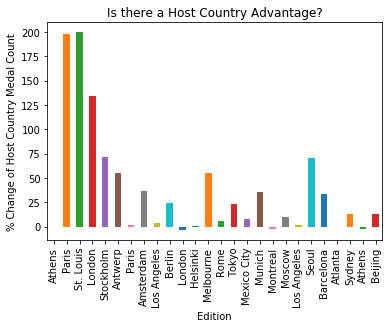

In [159]:
# Import pyplot
import matplotlib.pyplot as plt

# Extract influence['Change']: change
change = influence['Change']

# Make bar plot of change: ax
ax = change.plot(kind='bar')

# Customize the plot to improve readability
ax.set_ylabel("% Change of Host Country Medal Count")
ax.set_title("Is there a Host Country Advantage?")
ax.set_xticklabels(editions['City'])

# Display the plot
plt.show()